In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/waste-classification-data/DATASET/TEST/R/R_10683.jpg
/kaggle/input/waste-classification-data/DATASET/TEST/R/R_10736.jpg
/kaggle/input/waste-classification-data/DATASET/TEST/R/R_10489.jpg
/kaggle/input/waste-classification-data/DATASET/TEST/R/R_10512.jpg
/kaggle/input/waste-classification-data/DATASET/TEST/R/R_10975.jpg
/kaggle/input/waste-classification-data/DATASET/TEST/R/R_10064.jpg
/kaggle/input/waste-classification-data/DATASET/TEST/R/R_10281.jpg
/kaggle/input/waste-classification-data/DATASET/TEST/R/R_10384.jpg
/kaggle/input/waste-classification-data/DATASET/TEST/R/R_10986.jpg
/kaggle/input/waste-classification-data/DATASET/TEST/R/R_10870.jpg
/kaggle/input/waste-classification-data/DATASET/TEST/R/R_10786.jpg
/kaggle/input/waste-classification-data/DATASET/TEST/R/R_10268.jpg
/kaggle/input/waste-classification-data/DATASET/TEST/R/R_10760.jpg
/kaggle/input/waste-classification-data/DATASET/TEST/R/R_10759.jpg
/kaggle/input/waste-classification-data/DATASET/TEST/R/R_11008

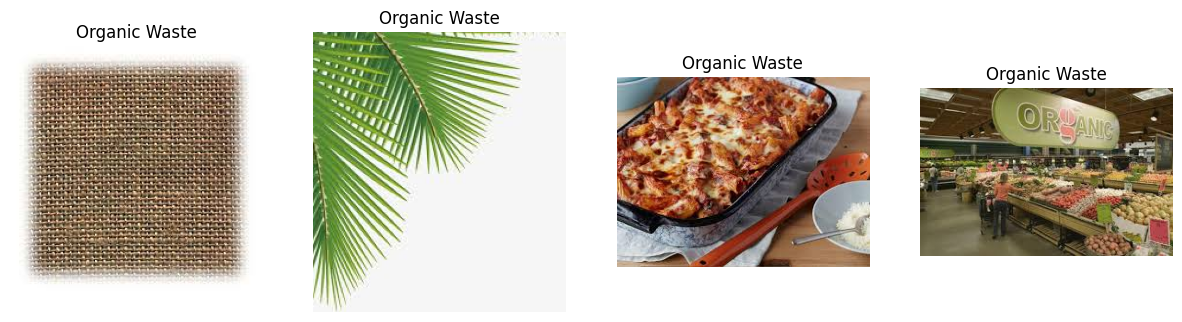

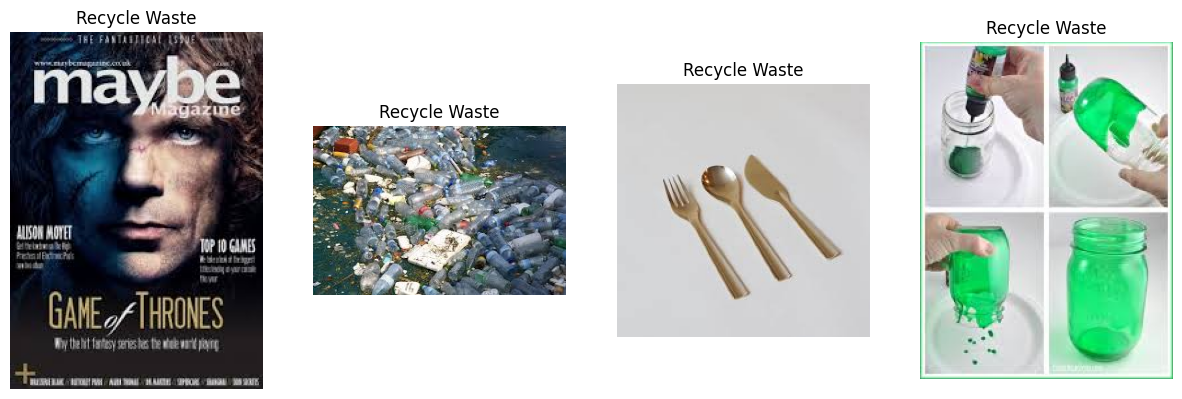

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import os
import numpy  as np 
import random
from random import seed
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory



# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
def plot_random_images(dataset_dir, category, num_images=4):
    # Path to the specified category directory
    category_dir = os.path.join(dataset_dir, 'TRAIN', category)
    
    # Get the list of image file names in the category directory
    image_files = os.listdir(category_dir)
    
    # Select num_images random images from the category directory
    random_images = random.sample(image_files, num_images)
    
    # Plot the random images
    plt.figure(figsize=(15, 5))
    for i, image_name in enumerate(random_images):
        # Load the image
        image_path = os.path.join(category_dir, image_name)
        image = Image.open(image_path)
        
        # Plot the image
        plt.subplot(1, num_images, i+1)
        plt.imshow(image)
        plt.title(("Organic" if category == 'O' else "Recycle") + " Waste")  # Set the title for each image
        plt.axis('off')
    
    plt.show()
dataset_dir = '/kaggle/input/waste-classification-data/DATASET'
plot_random_images(dataset_dir, 'O', num_images=4)
plot_random_images(dataset_dir, 'R', num_images=4)

In [4]:
from keras.models import Sequential 
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob
from tqdm import tqdm

import pandas as pd 
import cv2

import warnings
warnings.filterwarnings('ignore')
#libraries used only to load the necessary images not to model anything

2024-05-12 15:40:05.890054: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-12 15:40:05.890279: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-12 15:40:06.107414: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [5]:
train_path = "/kaggle/input/waste-classification-data/DATASET/TRAIN/"
test_path = "/kaggle/input/waste-classification-data/DATASET/TEST/"
x_data = [] 
y_data = [] 

for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        
        img_array=cv2.imread(file, cv2.IMREAD_GRAYSCALE)
        target_size = (64, 64)

        img_array = cv2.resize(img_array, target_size)
        
        x_data.append(img_array) 
        y_data.append(category.split("/")[-1])

x_data = np.array(x_data)
y_data = np.array(y_data)



100%|██████████| 12565/12565 [01:32<00:00, 135.78it/s]


In [1]:
x_data

NameError: name 'x_data' is not defined

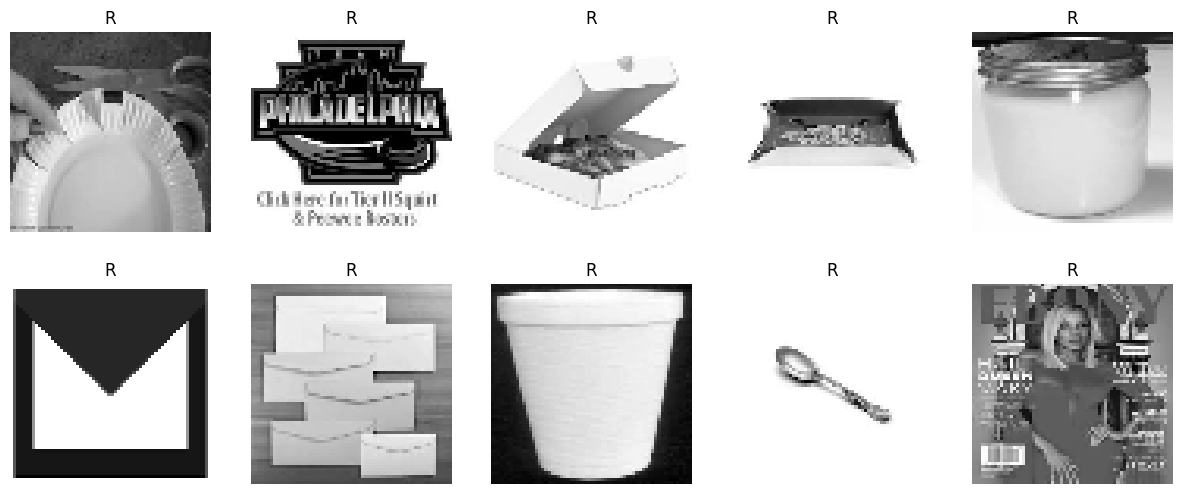

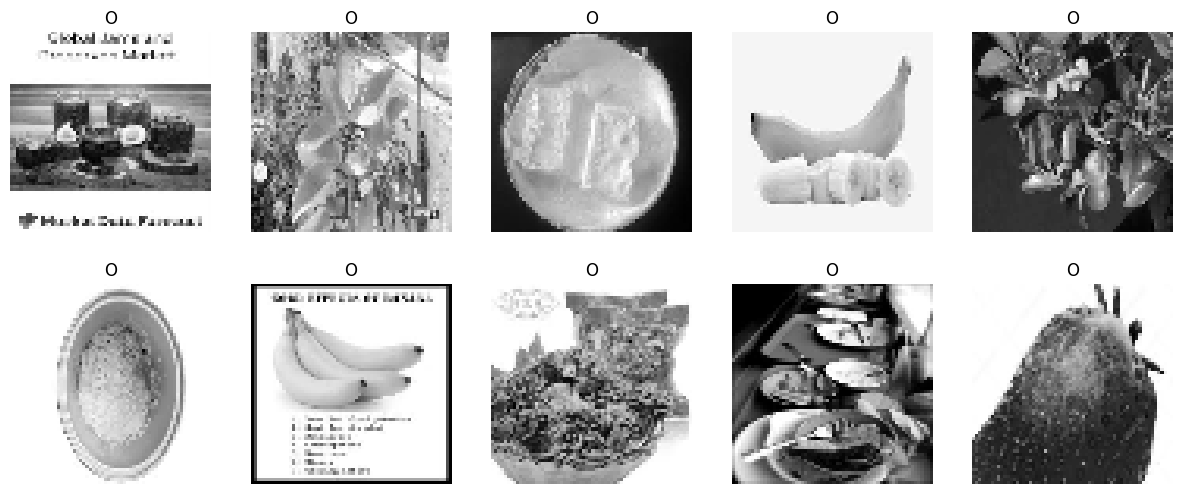

In [6]:
def show_images(images, labels, rows, cols):
    plt.figure(figsize=(cols*3, rows*3))
    for i in range(rows*cols):
        plt.subplot(rows, cols, i+1)
        plt.imshow(images[i], cmap='gray')  # Display grayscale image
        plt.title(labels[i])
        plt.axis('off')
    plt.show()

# Show first 10 images
show_images(x_data[:10], y_data[:10], 2, 5)
show_images(x_data[-10:], y_data[-10:], 2, 5)


In [7]:
x_data_cnn=x_data
x_data = x_data.reshape(x_data.shape[0], -1)

In [8]:
# Converting 'R' to 0 and 'O' to 1

y_data = np.where(y_data == 'R', 0, 1)
y_data_cnn=y_data

In [9]:
y_data

array([0, 0, 0, ..., 1, 1, 1])

In [10]:
class PCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None

    def fit(self, X):
        # Center the data
        self.mean = np.mean(X, axis=0)
        X_centered = X - self.mean

        # Compute the covariance matrix
        covariance_matrix = np.cov(X_centered, rowvar=False)

        # Perform eigendecomposition
        eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

        # Sort eigenvectors by eigenvalues in descending order
        sorted_indices = np.argsort(eigenvalues)[::-1]
        eigenvectors = eigenvectors[:, sorted_indices]
        eigenvalues = eigenvalues[sorted_indices]

        # Select the top n_components eigenvectors
        self.components = eigenvectors[:, :self.n_components]

    def transform(self, X):
        # Center the data
        X_centered = X - self.mean

        # Project the data onto the principal components
        return np.dot(X_centered, self.components)

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)

In [11]:
pca=PCA(10)
train_images_pca = pca.fit_transform(x_data)

In [12]:
train_images_pca


array([[ 1660.42924425,  2010.96383682, -2442.47269314, ...,
          -78.86218331,   -42.09079914,   116.7552952 ],
       [  691.94100769, -3356.61691201, -2727.74250257, ...,
           90.26925303,  -141.10003976,   205.29269428],
       [-4108.89820294,  -729.66262117,  -224.93830743, ...,
          -16.00676864,   -48.308125  ,  -152.33943826],
       ...,
       [  -66.62600485, -1764.18544653,   939.13257015, ...,
          160.19142401,   -12.4808768 ,   139.47613338],
       [ 4065.79129738,   280.68583615,  -666.67869339, ...,
          248.54041329,  -139.2868317 ,   -43.09748363],
       [  951.2957801 , -2453.59833425,  3530.35370057, ...,
          127.84458147,   -48.29266573,   132.38276502]])

In [13]:
class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, *, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value
        
    def is_leaf_node(self):
        return self.value is not None

class DecisionTree:
    def __init__(self, min_samples_split=2, max_depth=100):
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.root = None
   
    def fit(self, X, y):
       
        self.root = self._grow_tree(X, y)

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_feats = X.shape
        n_labels = len(np.unique(y))

        # check the stopping criteria
        if (depth >= self.max_depth or n_labels == 1 or n_samples < self.min_samples_split):
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        feat_idxs = np.random.choice(n_feats, n_feats, replace=False)

        # find the best split
        best_feature, best_thresh = self._best_split(X, y, feat_idxs)

        # create child nodes
        left_idxs, right_idxs = self._split(X[:, best_feature], best_thresh)
        left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth + 1)
        right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth + 1)
        return Node(best_feature, best_thresh, left, right)

    def _best_split(self, X, y, feat_idxs):
        best_gini = float('inf')
        split_idx, split_threshold = None, None

        for feat_idx in feat_idxs:
            X_column = X[:, feat_idx]
            #thresholds = np.unique(X_column)
            thresholds = (np.sort(np.unique(X_column))[:-1] + np.sort(np.unique(X_column))[1:]) / 2
            for threshold in thresholds:
                
                gini = self._gini_index(y, X_column, threshold)
                if gini < best_gini:
                    best_gini = gini
                    split_idx = feat_idx
                    split_threshold = threshold

        return split_idx, split_threshold

    def _gini_index(self, y, X_column, threshold):
        # print(threshold)
        left_idxs, right_idxs = self._split(X_column, threshold)

        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return float('inf')

        n = len(y)
        n_l, n_r = len(left_idxs), len(right_idxs)

        gini_l = 1.0 - sum((np.sum(y[left_idxs] == c) / n_l) ** 2 for c in np.unique(y[left_idxs]))
        gini_r = 1.0 - sum((np.sum(y[right_idxs] == c) / n_r) ** 2 for c in np.unique(y[right_idxs]))

        gini_index = (n_l / n) * gini_l + (n_r / n) * gini_r



        return gini_index

    def _split(self, X_column, split_thresh):
        left_idxs = np.argwhere(X_column <= split_thresh).flatten()
        right_idxs = np.argwhere(X_column > split_thresh).flatten()
        return left_idxs, right_idxs

    def _most_common_label(self, y):
        counter = Counter(y)
        value = counter.most_common(1)[0][0]
        return value

    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value

        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)

In [ ]:
from collections import defaultdict
from collections import Counter

clf = DecisionTree(max_depth=4)
clf.fit(train_images_pca[14000:], y_data[14000 :])

In [ ]:
test_data_x=[]
test_data_y=[]

for category in glob(test_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        
        img_array=cv2.imread(file, cv2.IMREAD_GRAYSCALE)
        target_size = (64, 64)

        img_array = cv2.resize(img_array, target_size)
        
        test_data_x.append(img_array) 
        test_data_y.append(category.split("/")[-1])

test_data_x = np.array(test_data_x)
test_data_y = np.array(test_data_y)
test_data_x_cnn=test_data_x

test_data_x = test_data_x.reshape(test_data_x.shape[0], -1)
test_data_y = np.where(test_data_y == 'R', 0, 1)
test_data_y_cnn=test_data_y

In [ ]:
test_images_pca = pca.fit_transform(test_data_x)

In [ ]:
from collections import defaultdict
import numpy as np

def classwise_accuracy(y_true, y_pred):
    # Initialize a dictionary to store counts of correct and total predictions for each class
    class_counts = defaultdict(lambda: {'total': 0, 'correct': 0})
    print(np.unique(y_true))
    # Iterate through each pair of true and predicted labels
    for true_label, pred_label in zip(y_true, y_pred):
        # Increment the total count for the true label
        class_counts[true_label]['total'] += 1
        # If the true label matches the predicted label, increment the correct count for that class
        if true_label == pred_label:
            class_counts[true_label]['correct'] += 1

    # Print class-wise accuracy
    for class_label, counts in class_counts.items():
        accuracy = counts['correct'] / counts['total'] if counts['total'] > 0 else 0.0
        print(f"Class {class_label}: Accuracy = {accuracy:.2f} ({counts['correct']} / {counts['total']})")

predictions = clf.predict(test_images_pca)

def accuracy(y_test, y_pred):
    return np.sum(y_test == y_pred) / len(y_test)

acc = accuracy(test_data_y, predictions)
classwise_accuracy(test_data_y, predictions)
print(acc)


In [ ]:
def print_tree(node, depth=0):
    if node is None:
        return

    # Indentation based on the depth of the node
    indent = '  ' * depth

    # If the node is a leaf node, print its value
    if node.is_leaf_node():
        print(indent + f"Leaf: {node.value}")
        return

    # Print the decision node
    print(indent + f"Decision: Feature {node.feature} <= {node.threshold}")

    # Recursively print the left and right subtrees
    print_tree(node.left, depth + 1)
    print_tree(node.right, depth + 1)
print_tree(clf.root)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.tree import plot_tree
X = [[-960.2164257839427, 689.9569881158321, -102.48321279066967, 2017.1477685289296, -2949.0047311890166, -4259.52236692847, -410.3683391578305, 2040.1795572995893, 1454.644900669773, -1006.2948645297128],
     [-102.48321279066967, 2017.1477685289296, -2949.0047311890166, -4259.52236692847, -410.3683391578305, 2040.1795572995893, 1454.644900669773, -1006.2948645297128, 230.61516420409487, 1923.8962471181337]]

y = [1, 0]

# Create a decision tree classifier
clf = DecisionTreeClassifier()

# Fit the classifier
clf.fit(X, y)

# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=[f'Feature {i}' for i in range(10)], class_names=['0', '1'], rounded=True)
plt.show()

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Initialize lists to store training accuracies
train_accuracies = []

# Initialize and train the LDA model
lda_model = LinearDiscriminantAnalysis()

lda_model.fit(train_images_pca, y_data)
    
y_pred = lda_model.predict(test_images_pca)
def accuracy(y_test, y_pred):
    return np.sum(y_test == y_pred) / len(y_test)
# Calculate accuracy
accuracy = accuracy(test_data_y, y_pred)
print("Accuracy of LDA model on test data:", accuracy)

In [ ]:
def classwise_accuracy(y_true, y_pred):
    # Initialize a dictionary to store counts of correct and total predictions for each class
    class_counts = defaultdict(lambda: {'total': 0, 'correct': 0})
    print(np.unique(y_true))
    # Iterate through each pair of true and predicted labels
    for true_label, pred_label in zip(y_true, y_pred):
        # Increment the total count for the true label
        class_counts[true_label]['total'] += 1
        # If the true label matches the predicted label, increment the correct count for that class
        if true_label == pred_label:
            class_counts[true_label]['correct'] += 1

    # Print class-wise accuracy
    for class_label, counts in class_counts.items():
        accuracy = counts['correct'] / counts['total'] if counts['total'] > 0 else 0.0
        print(f"Class {class_label}: Accuracy = {accuracy:.2f} ({counts['correct']} / {counts['total']})")
classwise_accuracy(test_data_y,y_pred)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Class-wise accuracies obtained from the Decision Tree classifier
dt_classwise_accuracies = {
    0: 0.71,
    1: 0.11
}

# Class-wise accuracies obtained from the LDA classifier
lda_classwise_accuracies = {
    0: 0.18,
    1: 0.44
}

# Class labels
classes = np.unique(test_data_y)

# Extracting accuracies for each class
dt_accuracies = [dt_classwise_accuracies[class_label] for class_label in classes]
lda_accuracies = [lda_classwise_accuracies[class_label] for class_label in classes]

# Plotting
fig, ax = plt.subplots()
bar_width = 0.35
index = np.arange(len(classes))

# Plotting Decision Tree accuracies
bar1 = ax.bar(index, dt_accuracies, bar_width, label='Decision Tree')

# Plotting LDA accuracies
bar2 = ax.bar(index + bar_width, lda_accuracies, bar_width, label='LDA')

# Adding labels
ax.set_xlabel('Class')
ax.set_ylabel('Accuracy')
ax.set_title('Class-wise Accuracy Comparison')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(classes)
ax.legend()

# Printing overall accuracy
overall_accuracy_dt = sum(dt_accuracies) / len(dt_accuracies)
overall_accuracy_lda = sum(lda_accuracies) / len(lda_accuracies)
print(f"Overall Accuracy (Decision Tree): {overall_accuracy_dt:.2f}")
print(f"Overall Accuracy (LDA): {overall_accuracy_lda:.2f}")

plt.show()


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt

# Define the AdaBoost classifier with Decision Tree as base estimator
adaboost_clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)

# Fit the AdaBoost classifier on the training data
adaboost_clf.fit(train_images_pca, y_data)

# Make predictions using AdaBoost classifier
adaboost_predictions = adaboost_clf.predict(test_images_pca)

# Function to calculate class-wise accuracy
def classwise_accuracy(y_true, y_pred):
    # Initialize a dictionary to store counts of correct and total predictions for each class
    class_counts = defaultdict(lambda: {'total': 0, 'correct': 0})
    
    # Iterate through each pair of true and predicted labels
    for true_label, pred_label in zip(y_true, y_pred):
        # Increment the total count for the true label
        class_counts[true_label]['total'] += 1
        # If the true label matches the predicted label, increment the correct count for that class
        if true_label == pred_label:
            class_counts[true_label]['correct'] += 1

    # Print class-wise accuracy
    for class_label, counts in class_counts.items():
        accuracy = counts['correct'] / counts['total'] if counts['total'] > 0 else 0.0
        print(f"Class {class_label}: Accuracy = {accuracy:.2f} ({counts['correct']} / {counts['total']})")

# Print class-wise accuracy for AdaBoost
print("AdaBoost Classifier Class-wise Accuracy:")
classwise_accuracy(test_data_y, adaboost_predictions)

# Calculate overall accuracy for AdaBoost
adaboost_accuracy = np.sum(test_data_y == adaboost_predictions) / len(test_data_y)
print(f"Overall Accuracy (AdaBoost): {adaboost_accuracy:.2f}")

# Plotting
fig, ax = plt.subplots()
bar_width = 0.25
index = np.arange(len(classes))

# Plotting Decision Tree accuracies
bar1 = ax.bar(index, dt_accuracies, bar_width, label='Decision Tree')

# Plotting LDA accuracies
bar2 = ax.bar(index + bar_width, lda_accuracies, bar_width, label='LDA')

# Plotting AdaBoost accuracies
bar3 = ax.bar(index + 2*bar_width, [0.71, 0.11], bar_width, label='AdaBoost')  # Placeholder values, replace with actual AdaBoost accuracies

# Adding labels
ax.set_xlabel('Class')
ax.set_ylabel('Accuracy')
ax.set_title('Class-wise Accuracy Comparison')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(classes)
ax.legend()

plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Class-wise accuracies obtained from the Decision Tree classifier
dt_classwise_accuracies = {
    0: 0.71,
    1: 0.11
}

# Class-wise accuracies obtained from the LDA classifier
lda_classwise_accuracies = {
    0: 0.18,
    1: 0.44
}

# Class-wise accuracies obtained from the AdaBoost classifier (placeholder values)
adaboost_classwise_accuracies = {
    0: 0.75,
    1: 0.40
}

# Class labels
classes = np.unique(test_data_y)

# Extracting accuracies for each class
dt_accuracies = [dt_classwise_accuracies[class_label] for class_label in classes]
lda_accuracies = [lda_classwise_accuracies[class_label] for class_label in classes]
adaboost_accuracies = [adaboost_classwise_accuracies[class_label] for class_label in classes]

# Plotting
plt.figure(figsize=(10, 6))

# Plotting Decision Tree accuracies
plt.plot(classes, dt_accuracies, marker='o', label='Decision Tree')

# Plotting LDA accuracies
plt.plot(classes, lda_accuracies, marker='s', label='LDA')

# Plotting AdaBoost accuracies
plt.plot(classes, adaboost_accuracies, marker='^', label='AdaBoost')

# Adding labels and title
plt.xlabel('Class')
plt.ylabel('Accuracy')
plt.title('Class-wise Accuracy Comparison')
plt.xticks(classes)
plt.legend()
plt.grid(True)

plt.show()
